Colab🤩 -> https://drive.google.com/file/d/1dduQbMh8PcGC1ygVNl9sBPeed8w1Tf2y/view?usp=sharing

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [153]:
U_dc = [10, 12, 14, 16, 18, 20, 22]
I_dc = [16, 23, 28, 32, 37, 42, 47]

U_dl = [10, 12, 14, 16, 18, 20, 22]
I_dl = [15, 23, 28, 32, 36, 41, 46]

U_d = [10, 12, 14, 16, 18, 20, 22]
I_d = [15, 23, 28, 32, 36, 41, 46]

data_5_1 = {'U_ДС (В)': U_dc, 'I_ДС (мА)': I_dc}
data_5_2 = {'U_ДL (В)': U_dl, 'I_ДL (мА)': I_dl}
data_5_3 = {'U_d (В)': U_d, 'I_d (мА)': I_d}

df_5_1 = pd.DataFrame(data_5_1)
df_5_2 = pd.DataFrame(data_5_2)
df_5_3 = pd.DataFrame(data_5_3)

In [154]:
# Перевод из mA -> A

df_5_1["I_ДС (мА)"] = df_5_1["I_ДС (мА)"].apply(lambda x: x * 10 ** -3)
df_5_2["I_ДL (мА)"] = df_5_2["I_ДL (мА)"].apply(lambda x: x * 10 ** -3)
df_5_3["I_d (мА)"] = df_5_3["I_d (мА)"].apply(lambda x: x * 10 ** -3)

In [155]:
# U_dc = [10, 12, 14, 16, 18, 20, 22]
# I_dc = [27, 37, 44, 50, 56, 61, 66]

# U_dl = [10, 12, 14, 16, 18, 20, 22]
# I_dl = [25, 33, 39, 43, 48, 53, 57]

# U_d = [10, 12, 14, 16, 18, 20, 22]
# I_d = [34, 44, 54, 60, 67, 72, 77]

# data_5_1 = {
#     'U_ДС (В)': U_dc,
#     'I_ДС (мА)': I_dc
# }

# data_5_2 = {
#     'U_ДL (В)': U_dl,
#     'I_ДL (мА)': I_dl
# }

# data_5_3 = {
#     'U_d (В)': U_d,
#     'I_d (мА)': I_d
# }

# df_5_1 = pd.DataFrame(data_5_1)
# df_5_2 = pd.DataFrame(data_5_2)
# df_5_3 = pd.DataFrame(data_5_3)

In [156]:
# df_5_1["I_ДС (мА)"] = df_5_1["I_ДС (мА)"].apply(lambda x: x * 10 ** -3)
# df_5_2["I_ДL (мА)"] = df_5_2["I_ДL (мА)"].apply(lambda x: x * 10 ** -3)
# df_5_3["I_d (мА)"] = df_5_3["I_d (мА)"].apply(lambda x: x * 10 ** -3)

In [157]:
display(df_5_1.T)
display(df_5_2.T)
display(df_5_3.T)

,0,1,2,3,4,5,6
U_ДС (В),10.000,12.000,14.000,16.000,18.000,20.000,22.000
I_ДС (мА),0.016,0.023,0.028,0.032,0.037,0.042,0.047


,0,1,2,3,4,5,6
U_ДL (В),10.000,12.000,14.000,16.000,18.000,20.000,22.000
I_ДL (мА),0.015,0.023,0.028,0.032,0.036,0.041,0.046


,0,1,2,3,4,5,6
U_d (В),10.000,12.000,14.000,16.000,18.000,20.000,22.000
I_d (мА),0.015,0.023,0.028,0.032,0.036,0.041,0.046


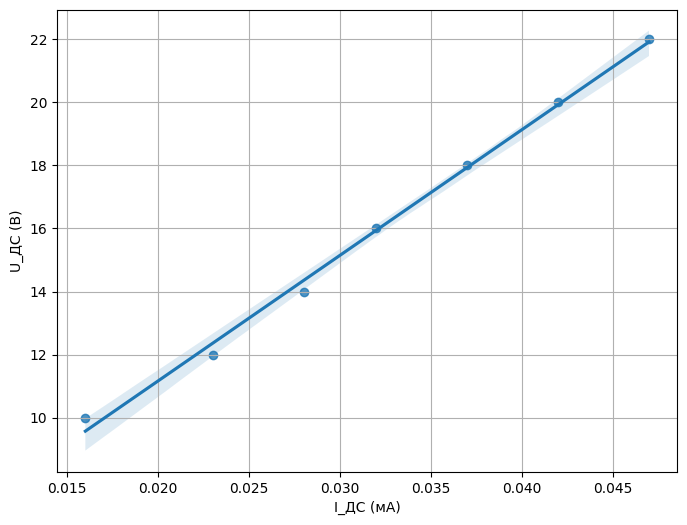

In [158]:
plt.figure(figsize=(8, 6))
sns.regplot(y=df_5_1["U_ДС (В)"], x=df_5_1["I_ДС (мА)"], marker='o' )

plt.ylabel('U_ДС (В)')
plt.xlabel('I_ДС (мА)')
plt.grid(True)

plt.show()

In [159]:
from scipy.stats import linregress
_ = linregress( x = df_5_1["I_ДС (мА)"], y = df_5_1["U_ДС (В)"])
X_c = _.slope
X_c

398.3739837398373

In [160]:
OMEGA = 2 * np.pi * 50
OMEGA = round(OMEGA)
OMEGA

314

In [161]:
C = 1/(OMEGA * X_c)
C = C
C

7.994280514753675e-06

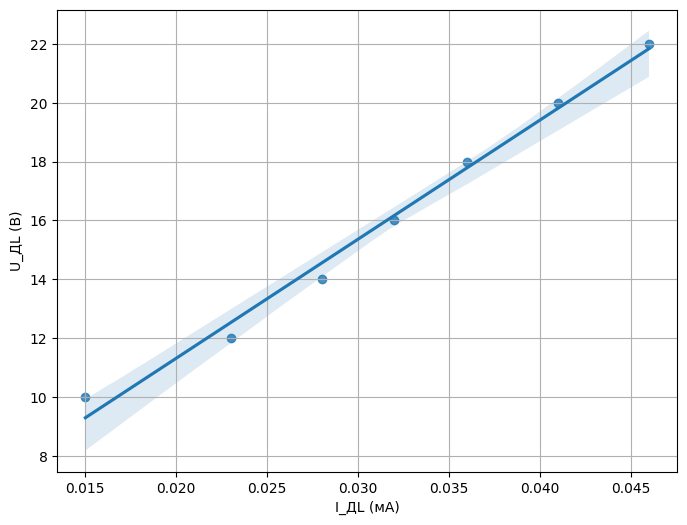

In [162]:
plt.figure(figsize=(8, 6))
sns.regplot(x="I_ДL (мА)", y="U_ДL (В)", data=df_5_2, marker='o')

plt.ylabel('U_ДL (В)')
plt.xlabel('I_ДL (мА)')
plt.grid(True)

plt.show()

In [163]:
from scipy.stats import linregress
_ = linregress( x = df_5_2["I_ДL (мА)"], y = df_5_2["U_ДL (В)"])
Z_L = _.slope
Z_L = Z_L
Z_L

404.3001686340641

In [164]:
OMEGA

314

In [165]:
R_l = 22
L = (1/OMEGA) * ((Z_L ** 2 - R_l ** 2) ** (1/2))
L

1.2856724831778492

In [166]:
df_5_3["U_m"] = df_5_3["U_d (В)"].apply(lambda x: ((2 * x) ** (1/2)))
df_5_3["I_m"] = df_5_3["I_d (мА)"].apply(lambda x: ((2 * x) ** (1/2)))
df_5_3.T

,0,1,2,3,4,5,6
U_d (В),10.000000,12.000000,14.000000,16.000000,18.000000,20.000000,22.000000
I_d (мА),0.015000,0.023000,0.028000,0.032000,0.036000,0.041000,0.046000
U_m,4.472136,4.898979,5.291503,5.656854,6.000000,6.324555,6.633250
I_m,0.173205,0.214476,0.236643,0.252982,0.268328,0.286356,0.303315


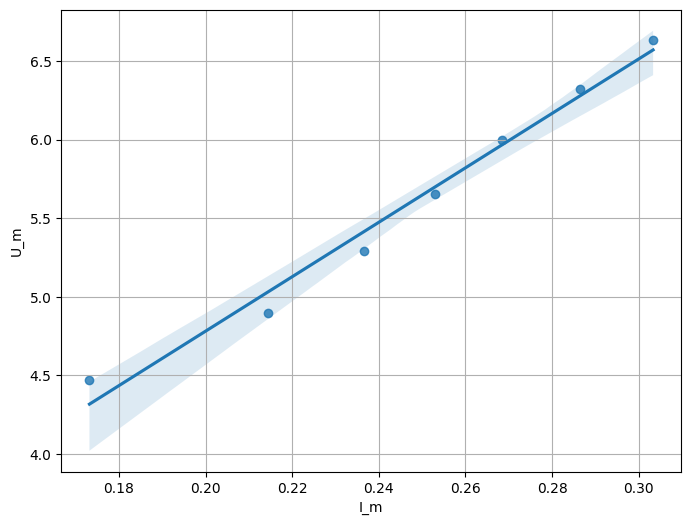

17.326476990198934

In [167]:

plt.figure(figsize=(8, 6))
sns.regplot(y=df_5_3['U_m'], x = df_5_3['I_m'], marker='o')

plt.ylabel('U_m')
plt.xlabel('I_m')
plt.grid(True)

plt.show()

regression_result_m = linregress(y = df_5_3["U_m"], x = df_5_3['I_m'])
Z = regression_result_m.slope
display(Z)

In [168]:
x_1 = OMEGA * L
x_2 = OMEGA * L
x_3 = 1/(OMEGA * C)
print(x_1,x_2,x_3)

403.70115971784463 403.70115971784463 398.37398373983723


In [169]:
R = 240
Z_alt = (R**2 + (OMEGA * L - 1/(OMEGA * C)) ** 2) ** (1/2)
Z_alt

240.05911522768858

# Построение Векторной диаграммы
Теперь R = R_l

In [170]:
R = R_l = 240

In [171]:
df = pd.DataFrame()
df["I_m"] = df_5_3["U_m"].apply(lambda x: x/Z)
df["U_L"] = df["I_m"].apply(lambda x: x * OMEGA * L)
df["U_c"] = df["I_m"].apply(lambda x: x / (OMEGA * C))
df["U_r"] = df["I_m"].apply(lambda x: x * R)

I_m = (round(df["I_m"].mean(),2))
U_L = (round(df["U_L"].mean(),2))
U_c = (round(df["U_c"].mean(),2))
U_r = (round(df["U_r"].mean(),2))

display(I_m)
display(U_L)
display(U_c)
display(U_r)

0.32

130.74

129.01

77.72

In [172]:
U_m = (U_r ** 2 + (U_L - U_c) ** 2) ** (1/2) 
U_m

77.73925199022692

In [173]:
tg_fi = ((OMEGA * L - 1) / (OMEGA * C)) / R_l
tg_fi

668.440271889376

In [174]:
np.arctan(tg_fi)

1.5693003079342298